<a href="https://colab.research.google.com/github/sharadnatarajSJSU/FastAi_NeuralNetworks/blob/main/CMPE_258_assignment_1_part_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook

     |████████████████████████████████| 720 kB 5.3 MB/s 
     |████████████████████████████████| 1.2 MB 38.2 MB/s 
     |████████████████████████████████| 189 kB 50.7 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 51 kB 298 kB/s 


In [ ]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
from fastbook import *

# Image classifier using CNN_learner

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.166491,0.015540,0.005413,01:35


epoch,train_loss,valid_loss,error_rate,time
0,0.047309,0.012341,0.003383,02:10


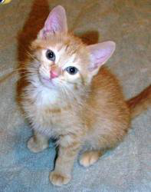

In [ ]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
uploader = SimpleNamespace(data = ['/content/chapter1_cat_example.jpg'])

In [ ]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 0.999997


#Unet Learner for segmentation

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,2.704526,5.324638,00:04


epoch,train_loss,valid_loss,time
0,2.323878,1.679532,00:04
1,1.854912,1.301093,00:04
2,1.642870,1.048514,00:04
3,1.455676,0.867354,00:04
4,1.288901,0.757908,00:04
5,1.154311,0.678053,00:04
6,1.045241,0.661845,00:04
7,0.958344,0.646561,00:04


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


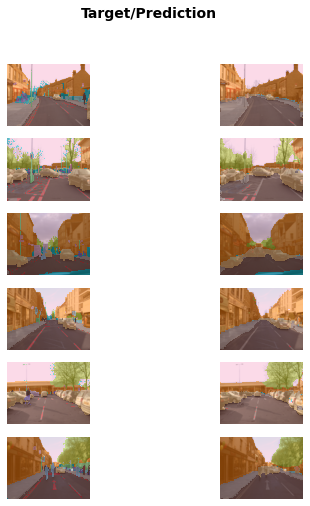

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

All objects are segmented by using different colored masks

#Text Classifier

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.472912,0.392490,0.822320,07:12


epoch,train_loss,valid_loss,accuracy,time
0,0.315331,0.235866,0.903880,14:07
1,0.248087,0.212871,0.918760,14:03
2,0.194959,0.197688,0.927000,14:01
3,0.137590,0.193531,0.930280,14:00


In [ ]:
learn.predict("I really liked that movie!",n_words=20)

TypeError: ignored

# Tabular for Decision Tree

In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.382581,0.360513,0.830927,00:07
1,0.355281,0.351091,0.838606,00:06
2,0.360611,0.347945,0.837991,00:06


#Collab Learner for ranking

In [ ]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.519207,1.413368,00:01


epoch,train_loss,valid_loss,time
0,1.388155,1.359782,00:00
1,1.294653,1.193021,00:00
2,1.049291,0.891161,00:00
3,0.825404,0.737101,00:00
4,0.701211,0.699669,00:00
5,0.646747,0.688687,00:00
6,0.618522,0.683482,00:00
7,0.600537,0.680893,00:00
8,0.609770,0.680110,00:00
9,0.594119,0.679964,00:00


In [ ]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,38.0,95.0,3.5,4.402937
1,53.0,49.0,5.0,4.268655
2,41.0,49.0,4.0,4.011588
3,24.0,1.0,4.0,3.606720
4,72.0,40.0,3.5,2.999226
5,62.0,44.0,3.0,3.019116
6,14.0,18.0,3.0,4.017102
7,27.0,68.0,1.5,3.370472
8,16.0,63.0,4.0,4.526047
